In [1]:
import vk  

In [2]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [3]:
personal_token = "" 
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [4]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 100  
   
   
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [5]:
Huun_members = get_members("huunhuurtu")
len(Huun_members)

5440

In [6]:
def save_members_to_file(filename, Huun_members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in Huun_members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:  
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else: 
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1] 
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [7]:
with open("members_vk_groups.tsv", 'w', encoding='utf-8') as f:
        for member in Huun_members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"]
            if int(sex) == 1:  
                sex = "F"  
            elif int(sex) == 2: 
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-") 
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")

In [8]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [9]:
import re

In [10]:
posts = get_posts("huunhuurtu")
print (posts)

['', '', 'Ulrich Balss', 'Huun Huur Tu', '', '', '', '', '', 'Дорогие друзья!\n\nСкоро, 13го декабря состоится наш концерт в Москве, в Вегас Сити Холле. \n\nХорошая новость: Черная пятница до 1 декабря! Cкидка на наш концерт 30% по промокоду 30BF19 .\n\nДрузья, успевайте купить билеты!\n\nСсылка: \nhttps://vegas-hall.ru/afisha/huurtu19/', 'Уникальный концерт «Хуун-Хуур-Ту»', '', '', '', '', '', '', 'WORLD MUSIC, Sep.16- Huun Huur Tu @ 1862 Theatre', '', '', 'Доброе утро друзья! Слушайте наше интервью на радио Серебрянный дождь прямо сейчас! А вечером приходите на наш концерт в Москве в парке Музеон. Пост ниже.\n100.1 FM #silverraineadio #huunhuurtu #concerthuunhuurtumoscow #moiaplaneta #muzeon', '', '', '', '', 'Ансамбль "Хуун-Хуур-Ту"', 'Приглашаем к просмотру наше живое выступление в KEXP, Калифорния этим летом.\nhttps://youtu.be/R2ovoRyv4kw', '', '', '', '', 'концерт в Тюмени', 'Этнический квартет «Хуун-Хуур-Ту» - музыка великой степи', '', '', 'Репортаж о нашем выступлении в Москве

In [11]:
posts = get_posts("huunhuurtu")
len(posts)

128

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd

df = pd.read_csv("members_vk_groups.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [14]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"1666,",Anatoly,Korotchenko,M,-,Moscow,Russia
1,"5197,",Inka,Kapak,F,-,Saint Petersburg,Russia
2,"6045,",DELETED,NaN,F,-,-,-
3,"12871,",Valery,Vlaznev,M,1988,Moscow,Russia
4,"20351,",Anatoly,Buchin,M,1987,Seattle,USA
5,"20393,",Alexey,Chaynikov,M,-,Irkutsk,Russia
6,"21250,",Evgenia,Vovk,F,-,Saint Petersburg,Russia
7,"22304,",Stanislav,Aksarin,M,-,Saint Petersburg,Russia
8,"26660,",Igor,Sherstennikov,M,-,Saint Petersburg,Russia
9,"27202,",Yury,Ivanov,M,-,Saint Petersburg,Russia


In [15]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:30] 


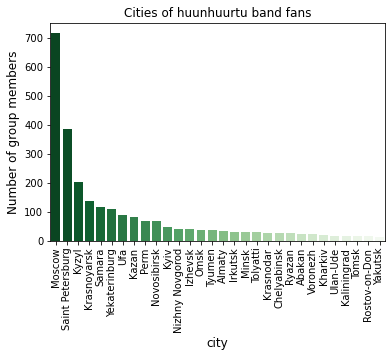

In [16]:
sns.barplot(city_count.index, city_count.values, palette='Greens_r') 
plt.title('Cities of huunhuurtu band fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

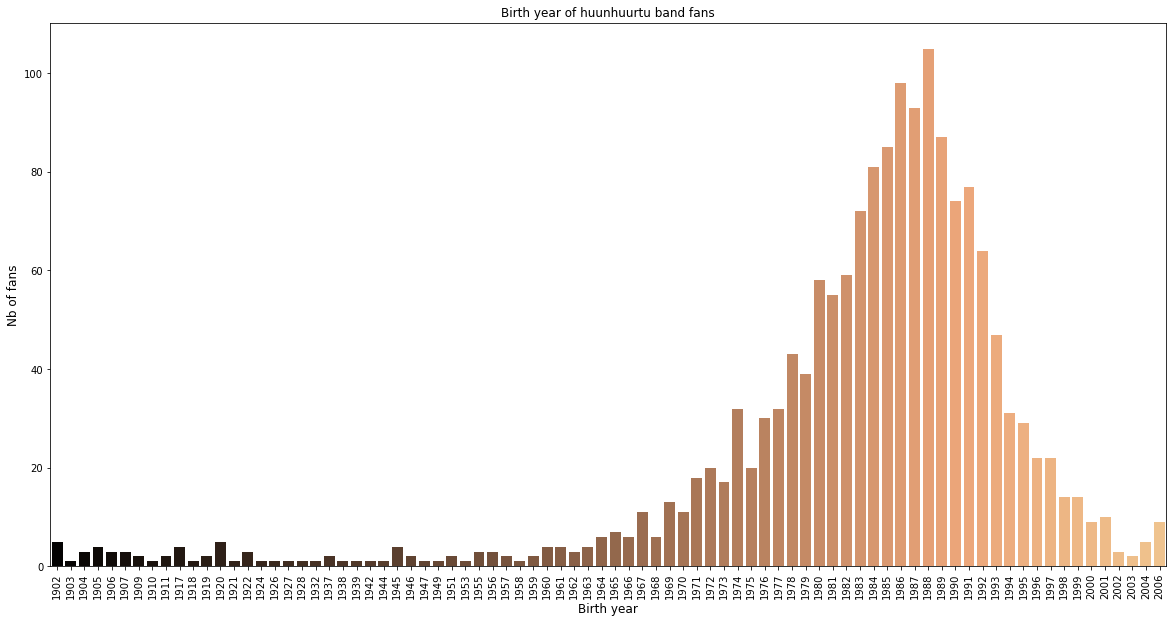

In [17]:
birth_count  = df['birth'].value_counts().drop('-') # выбираем столбец с датами рождения, подсчитываем их частоту и удаляем, то где нет д.Р
plt.figure(figsize=(20,10))   # размер картинки
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Birth year of huunhuurtu band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [18]:
sex_count  = df['sex'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
sex_count = sex_count[:2] # первые 20 городов
#print(city_count)

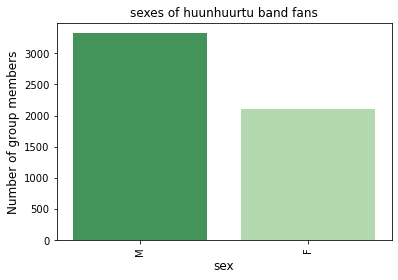

In [19]:
sns.barplot(sex_count.index, sex_count.values, palette='Greens_r') # рисуем график, выбираем цвет
plt.title('sexes of huunhuurtu band fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('sex', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [20]:
# определяем локальность 

In [21]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:3] 


In [22]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

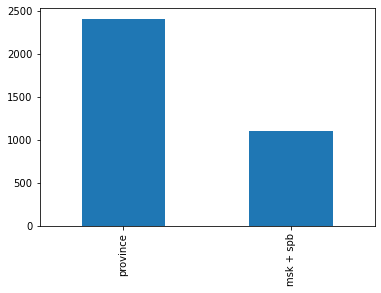

In [23]:
axes = city_count.plot.bar() 